# Import Dataset from Kaggle by using Kaggle api into drive

### Connect Google drive with Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Connect colab to Kaggle API

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [8]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


### Check prasent Directory

In [9]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [10]:
### Download Dataset from the Kaggle in zip format

In [11]:
!kaggle datasets download -d vic006/beginner

100% 6.77G/6.77G [02:49<00:00, 15.9MB/s]
100% 6.77G/6.77G [02:49<00:00, 43.0MB/s]


In [12]:
!ls

beginner.zip  Image_Classification_CNN.ipynb  kaggle.json


### Unzip Dataset and remove zip file

In [13]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Img-5500.jpg  
  inflating: train/train/Img-5501.jpg  
  inflating: train/train/Img-5502.jpg  
  inflating: train/train/Img-5503.jpg  
  inflating: train/train/Img-5504.jpg  
  inflating: train/train/Img-5505.jpg  
  inflating: train/train/Img-5506.jpg  
  inflating: train/train/Img-5507.jpg  
  inflating: train/train/Img-5508.jpg  
  inflating: train/train/Img-5509.jpg  
  inflating: train/train/Img-551.jpg  
  inflating: train/train/Img-5510.jpg  
  inflating: train/train/Img-5511.jpg  
  inflating: train/train/Img-5512.jpg  
  inflating: train/train/Img-5513.jpg  
  inflating: train/train/Img-5514.jpg  
  inflating: train/train/Img-5515.jpg  
  inflating: train/train/Img-5516.jpg  
  inflating: train/train/Img-5517.jpg  
  inflating: train/train/Img-5518.jpg  
  inflating: train/train/Img-5519.jpg  
  inflating: train/train/Img-552.jpg  
  inflating: train/train/Img-5520.jpg  
  inflating: train/train/Img-55

### Check GPU is provided or not

In [14]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


### Check NVIDIA GPU is enabled

In [16]:
!nvidia-smi

Wed Dec  2 16:35:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [18]:
## Current working Directory
!pwd

/content/gdrive/My Drive/Kaggle


In [20]:
!ls

Image_Classification_CNN.ipynb
kaggle.json
sample_submission.csv
test
testbeg.npy
test.csv
train
trainbeg.npy
train.csv
trainLabels.npy
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


## Import basice Machine Learning python libraries.

In [21]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

### See the all file present in the kaggle dir

In [22]:
import os
print(os.listdir("/content/gdrive/My Drive/Kaggle"))

['kaggle.json', 'Image_Classification_CNN.ipynb', 'sample_submission.csv', 'test.csv', 'test', 'testbeg.npy', 'train.csv', 'train', 'trainLabels.npy', 'trainbeg.npy', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']


## Data classes

In [23]:
data_classes = ["antelope", "bat", "beaver", "bobcat", "buffalo", "chihuahua", "chimpanzee", "collie", "dalmatian",
                "german+shepherd", "grizzly+bear", "hippopotamus", "horse", "killer+whale", "mole", "moose", "mouse",
                "otter", "ox", "persian+cat", "raccoon", "rat", "rhinoceros", "seal", "siamese+cat", "spider+monkey",
                "squirrel", "walrus", "weasel", "wolf"]

### Load the dataaset

In [24]:
df = np.load('/content/gdrive/My Drive/Kaggle/trainbeg.npy')

In [25]:
df

array([[[[ 99., 101., 111.],
         [115., 117., 125.],
         [135., 129., 128.],
         ...,
         [ 41.,  32.,  28.],
         [ 41.,  32.,  27.],
         [ 35.,  28.,  27.]],

        [[101., 102., 111.],
         [104., 106., 114.],
         [118., 111., 111.],
         ...,
         [ 40.,  31.,  30.],
         [ 39.,  31.,  29.],
         [ 32.,  26.,  26.]],

        [[118., 114., 122.],
         [116., 114., 116.],
         [121., 117., 120.],
         ...,
         [ 53.,  40.,  42.],
         [ 60.,  52.,  52.],
         [ 39.,  32.,  29.]],

        ...,

        [[ 55.,  68.,  83.],
         [ 59.,  71.,  85.],
         [ 59.,  72.,  88.],
         ...,
         [ 52.,  68.,  87.],
         [ 55.,  69.,  86.],
         [ 53.,  67.,  83.]],

        [[ 60.,  72.,  86.],
         [ 61.,  73.,  85.],
         [ 69.,  80.,  93.],
         ...,
         [ 42.,  63.,  91.],
         [ 52.,  67.,  84.],
         [ 50.,  64.,  79.]],

        [[ 53.,  67.,  83.],
       

In [26]:
df.shape

(13000, 64, 64, 3)

### Show some pictures

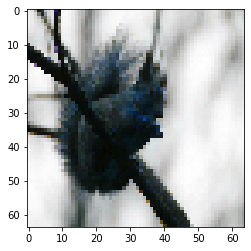

In [27]:
%matplotlib inline
from keras.preprocessing.image import array_to_img
img = array_to_img(df[1])
plt.imshow(img, interpolation='nearest')
plt.show()

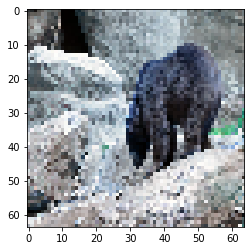

In [28]:
img = array_to_img(df[2])
plt.imshow(img, interpolation='nearest')
plt.show()

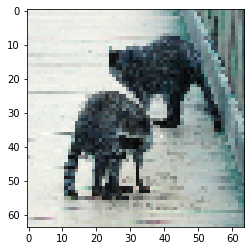

In [29]:
img = array_to_img(df[154])
plt.imshow(img, interpolation='nearest')
plt.show()

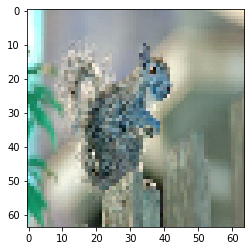

In [30]:
img = array_to_img(df[4565])
plt.imshow(img, interpolation='nearest')
plt.show()

### Load the train Label datasets

In [31]:
df_label =  np.load('/content/gdrive/My Drive/Kaggle/trainLabels.npy')
print(df_label.shape)
df_label = df_label.reshape(df_label.shape[0])
np.squeeze(df_label)
print(df_label.shape)
print(df_label)

(13000, 1)
(13000,)
[11 26 10 ... 26 26 26]


## Split the dataset into train and test set

In [32]:
from sklearn.model_selection import train_test_split

X_trn, X_val, Y_trn, Y_val = train_test_split(df,df_label, test_size=0.08, random_state=1)

In [33]:
print(f"shape of X_trn dataset:{X_trn.shape}")
print(f"shape of X_vl dataset:{X_val.shape}")
print(f"shape of y_trn dataset:{Y_trn.shape}")
print(f"shape of y_val dataset:{Y_val.shape}")

shape of X_trn dataset:(11960, 64, 64, 3)
shape of X_vl dataset:(1040, 64, 64, 3)
shape of y_trn dataset:(11960,)
shape of y_val dataset:(1040,)


### Load the VGG16 weights

In [34]:
inp_dm = X_trn.shape[1]
vgg_model_path = '/content/gdrive/My Drive/Kaggle/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
from keras.applications import VGG16
conv_base = VGG16(weights=vgg_model_path, include_top=False, input_shape=(inp_dm,inp_dm, 3))

conv_base.trainable = False
"""
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    if layer.name == 'block4_conv1':
        layer.trainable = True    
    else:
        layer.trainable = False
"""
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

# **Image Classification Model A** : Using VGG16

In [35]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.models import Model
from keras.layers import Activation, Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Input
from keras.layers import Dense

def VGG16_classifier():
    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(30, activation='softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [36]:
from keras.callbacks import  ReduceLROnPlateau
from keras.utils import to_categorical
model1 = VGG16_classifier()
callbacks_list = [ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3)]

history_vgg = model1.fit(x = X_trn/255.,y = to_categorical(Y_trn, num_classes=30), batch_size=64, epochs=100,
                         callbacks = callbacks_list, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                7

In [ ]:
history_vgg

### Model Accuracy Performance

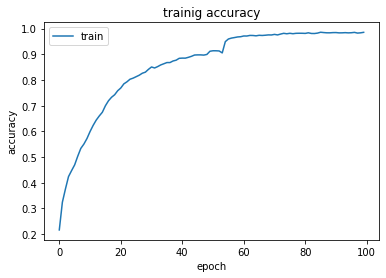

In [37]:
plt.plot(history_vgg.history['accuracy'])
plt.title('trainig accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Model loss Performance

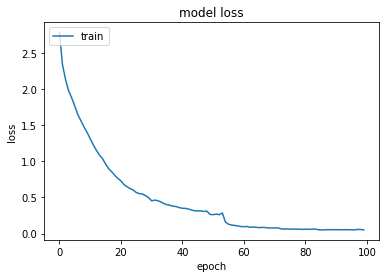

In [38]:
plt.plot(history_vgg.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Make the Prediction

In [41]:
from sklearn.metrics import accuracy_score
y_val_predict = np.argmax(model1.predict(x=X_val/255.),axis = 1)

print('\n',f"Predicted values: {y_val_predict}")

np.squeeze(Y_val)

print('\n',f"Actual values: {Y_val}")
print("Validation accuracy : {}%".format(100*accuracy_score(Y_val,y_val_predict)))


 Predicted values: [19  8  6 ... 29 29  0]

 Actual values: [22  8 29 ...  3 12  0]
Validation accuracy : 44.51923076923077%


In [42]:
y_val_predict = model1.predict(x=X_trn/255.)

print('\n',y_val_predict)


 [[3.7427639e-10 7.0786935e-16 8.6977082e-17 ... 4.5601624e-15
  1.7878702e-16 9.9999762e-01]
 [8.7287657e-07 3.5145085e-09 6.7231247e-12 ... 3.2417087e-09
  1.0102120e-11 1.3784064e-08]
 [2.8571192e-09 9.9994516e-01 3.2683155e-12 ... 4.2746737e-15
  8.4693461e-09 2.1028939e-09]
 ...
 [2.5742288e-14 1.2276307e-08 8.1160079e-11 ... 4.4509694e-09
  7.6363094e-10 9.3311314e-09]
 [2.6347474e-04 8.7904744e-03 4.0303508e-04 ... 1.8108278e-05
  9.8253930e-01 3.9752858e-04]
 [2.8039047e-09 6.7915423e-08 1.1709551e-08 ... 9.9452135e-10
  5.5620708e-09 3.4489214e-05]]


In [43]:
             
label_df = pd.DataFrame(data=y_val_predict, columns= data_classes)

label_df.head(10)


,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,grizzly+bear,hippopotamus,horse,killer+whale,mole,moose,mouse,otter,ox,persian+cat,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,3.742764e-10,7.078694e-16,8.697708e-17,9.549912e-08,3.333707e-13,3.398892e-11,1.955391e-16,9.397873e-12,1.876550e-13,3.528213e-11,4.869528e-07,6.543994e-14,3.876444e-07,6.309399e-19,5.857523e-18,2.440496e-16,5.496037e-14,6.321189e-16,1.405039e-06,5.916620e-14,1.185310e-13,2.785330e-14,6.155372e-11,6.217654e-10,1.460478e-13,1.881274e-13,3.658188e-15,4.560162e-15,1.787870e-16,9.999976e-01
1,8.728766e-07,3.514508e-09,6.723125e-12,5.949101e-09,3.378595e-06,8.794449e-09,2.875931e-09,8.152916e-10,2.123044e-12,6.299067e-09,7.210987e-07,4.990693e-10,1.368879e-06,5.254077e-14,5.947867e-12,1.154374e-07,5.046681e-10,3.549240e-10,9.999272e-01,9.280001e-10,2.510443e-12,5.158873e-11,6.643396e-05,6.461754e-09,3.374624e-10,1.330664e-12,2.822853e-11,3.241709e-09,1.010212e-11,1.378406e-08
2,2.857119e-09,9.999452e-01,3.268316e-12,2.336683e-11,1.464454e-13,5.354715e-05,2.642154e-07,1.533577e-08,7.080958e-08,1.398129e-07,2.378781e-13,3.838614e-13,2.633372e-09,1.677402e-12,1.715923e-13,6.440223e-14,1.868049e-09,1.181615e-10,3.075977e-09,8.692365e-12,1.133012e-09,4.910052e-07,1.053268e-08,6.811979e-11,1.805506e-07,1.607596e-11,5.479721e-11,4.274674e-15,8.469346e-09,2.102894e-09
3,4.506330e-09,1.824882e-11,1.428022e-09,8.490991e-08,1.278778e-04,4.013038e-13,1.344812e-04,6.726427e-08,4.116282e-10,8.890576e-08,1.017950e-05,5.264802e-11,6.896865e-11,3.608854e-15,8.730598e-12,9.997142e-01,7.926408e-12,7.233297e-08,1.948849e-07,2.420905e-09,2.915461e-09,5.378191e-12,1.060324e-05,1.869930e-14,7.341479e-11,3.866002e-11,4.322905e-09,2.335689e-11,9.983447e-11,2.159516e-06
4,2.287206e-15,1.514914e-08,3.898123e-09,4.015011e-09,1.230130e-13,8.316879e-12,8.514819e-09,1.022333e-09,7.872107e-14,6.301703e-11,6.430576e-08,1.278423e-08,9.394161e-16,9.736450e-11,2.998260e-10,1.796800e-12,2.691465e-10,9.998926e-01,1.273115e-14,4.497954e-09,1.556158e-08,3.705325e-09,1.204566e-10,9.287778e-05,5.131196e-08,1.240723e-10,1.425969e-05,1.476392e-07,4.419208e-09,3.277386e-10
5,8.013347e-07,2.900542e-06,2.659133e-05,9.346034e-04,5.429224e-10,8.509582e-09,3.955333e-06,3.904183e-09,2.264148e-10,3.163532e-05,3.148726e-05,5.832145e-06,4.967687e-09,6.809052e-08,1.624936e-07,1.988752e-05,6.158158e-06,9.946738e-01,1.161100e-08,1.854918e-07,3.480383e-03,2.065387e-07,9.127299e-07,2.211935e-05,1.009267e-07,9.742421e-07,6.540167e-05,9.653529e-06,1.176577e-05,6.702472e-04
6,5.544883e-14,1.733880e-11,6.014443e-12,1.529761e-11,2.914779e-14,1.738689e-14,8.075837e-11,1.352539e-09,7.391609e-14,5.859972e-10,8.403262e-11,9.999844e-01,7.325447e-10,1.619502e-10,1.222145e-14,4.980102e-13,4.543829e-16,3.631238e-07,2.926078e-12,7.959896e-09,7.680863e-12,2.096654e-08,1.521864e-05,7.394278e-09,1.009185e-09,8.128832e-14,6.655739e-10,4.318288e-09,8.499535e-13,2.035250e-11
7,1.167977e-12,6.724565e-16,5.790251e-09,3.637974e-13,2.265497e-13,1.382214e-12,7.218541e-14,7.007530e-08,5.785149e-13,2.245793e-13,1.964621e-07,9.999985e-01,1.637884e-10,2.250605e-08,1.549968e-12,5.720459e-12,1.772643e-12,9.612772e-07,5.287732e-13,4.507370e-13,1.406175e-09,3.168122e-08,2.451728e-13,1.532104e-07,7.010848e-11,5.357838e-15,4.181521e-09,4.107877e-09,1.378108e-11,3.373060e-12
8,2.744320e-10,5.001736e-07,1.338002e-03,3.789902e-07,1.201954e-07,2.947861e-10,1.232644e-05,1.315781e-07,2.186401e-07,2.031883e-08,1.949250e-06,9.973025e-01,6.423728e-11,7.615384e-07,1.601215e-06,1.400003e-05,4.552964e-07,1.215719e-03,1.231268e-09,9.738929e-06,1.859728e-06,3.815971e-07,9.370545e-06,5.380659e-05,6.183902e-06,4.928419e-07,1.881421e-06,2.101946e-05,6.099961e-06,3.691864e-07
9,1.000381e-04,1.455853e-05,6.374274e-06,1.162056e-03,5.991630e-06,3.323482e-07,8.533351e-04,2.092561e-05,7.270724e-07,1.382926e-05,6.484393e-04,5.462878e-07,5.257445e-06,5.230484e-08,3.627219e-05,9.961103e-01,2.69819

### Get label of maximum probabilty

In [44]:
label_df.idxmax(axis=1)

0               wolf
1                 ox
2                bat
3              moose
4              otter
            ...     
11955     rhinoceros
11956        buffalo
11957    persian+cat
11958         weasel
11959       squirrel
Length: 11960, dtype: object

In [45]:
pred = pd.DataFrame()
pred['pred_name'] = label_df.idxmax(axis=1)
pred['pred_prob'] = label_df.max(axis=1)
pred.head(10)

,pred_name,pred_prob
0,wolf,0.999998
1,ox,0.999927
2,bat,0.999945
3,moose,0.999714
4,otter,0.999893
5,otter,0.994674
6,hippopotamus,0.999984
7,hippopotamus,0.999998
8,hippopotamus,0.997303
9,moose,0.996110


# **Image Classification Model B**: without Using VGG16

### Self Made Model

In [46]:
inp_dim = X_trn.shape[1]
input_shape = (inp_dim, inp_dim, 3)
input_shape

(64, 64, 3)

In [47]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3),  activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), ))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=30, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)       

In [49]:
from keras.callbacks import  ReduceLROnPlateau
from keras.utils import to_categorical
#model1 = VGG16_classifier()
callbacks_list = [ReduceLROnPlateau(monitor='loss',factor=0.2,patience=3)]

history = model.fit(x = X_trn/255.,y = to_categorical(Y_trn, num_classes=30),
                    batch_size=64, epochs=100, callbacks = callbacks_list, verbose=1)

Epoch 1/100
187/187 [==============================] - 3s 18ms/step - loss: 3.1765 - accuracy: 0.1196
Epoch 2/100
187/187 [==============================] - 3s 17ms/step - loss: 2.8696 - accuracy: 0.1901
Epoch 3/100
187/187 [==============================] - 3s 16ms/step - loss: 2.7104 - accuracy: 0.2303
Epoch 4/100
187/187 [==============================] - 3s 17ms/step - loss: 2.6190 - accuracy: 0.2533
Epoch 5/100
187/187 [==============================] - 3s 16ms/step - loss: 2.5293 - accuracy: 0.2727
Epoch 6/100
187/187 [==============================] - 3s 16ms/step - loss: 2.4575 - accuracy: 0.2870
Epoch 7/100
187/187 [==============================] - 3s 16ms/step - loss: 2.3889 - accuracy: 0.3076
Epoch 8/100
187/187 [==============================] - 3s 16ms/step - loss: 2.3467 - accuracy: 0.3208
Epoch 9/100
187/187 [==============================] - 3s 16ms/step - loss: 2.2879 - accuracy: 0.3306
Epoch 10/100
187/187 [==============================] - 3s 16ms/step - loss: 2.248

## Prediction

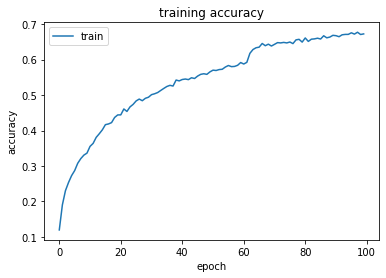

In [50]:
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Model Accuracy

In [52]:
from sklearn.metrics import accuracy_score
y_val_predict = np.argmax(model.predict(x=X_val/255.),axis = 1)

print('\n',f"Predicted values: {y_val_predict}")

np.squeeze(Y_val)

print('\n',f"Actual values: {Y_val}")
print("Validation accuracy : {}%".format(100*accuracy_score(Y_val,y_val_predict)))


 Predicted values: [22  8 11 ... 17 12  0]

 Actual values: [22  8 29 ...  3 12  0]
Validation accuracy : 54.230769230769226%


In [53]:
y_val_predict = model.predict(x=X_trn/255.)

print('\n',y_val_predict)


 [[6.5693462e-06 2.5883907e-07 1.4600474e-08 ... 6.3267787e-11
  2.9530975e-08 9.9877018e-01]
 [1.2179062e-06 3.3325522e-04 7.5693488e-06 ... 1.9074191e-06
  3.9301543e-05 2.0172453e-04]
 [6.5881140e-05 6.1549640e-01 2.1859619e-03 ... 1.2263129e-03
  3.9048154e-02 2.7836587e-02]
 ...
 [3.5040893e-03 2.2771984e-02 3.3692361e-04 ... 2.3906517e-03
  7.4314289e-02 9.8564266e-04]
 [8.9411410e-03 8.3738496e-06 4.8251495e-05 ... 1.9924464e-05
  8.7417614e-01 1.2667490e-03]
 [8.7421048e-09 1.5620082e-06 2.2037582e-07 ... 1.1654195e-09
  4.1848108e-07 1.1168984e-03]]


In [54]:
              
label_df1 = pd.DataFrame(data=y_val_predict, columns= data_classes)

label_df1.head(10)

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,grizzly+bear,hippopotamus,horse,killer+whale,mole,moose,mouse,otter,ox,persian+cat,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,0.000007,2.588391e-07,1.460047e-08,0.000314,2.698710e-13,6.929024e-06,4.541812e-08,0.000008,7.323960e-12,5.106490e-04,1.555837e-09,6.240637e-09,1.265035e-07,9.644832e-18,7.328977e-08,0.000004,7.871188e-06,6.641603e-09,4.488341e-08,9.162152e-07,1.317783e-04,1.998865e-06,1.584474e-08,2.555788e-10,4.015741e-08,7.904961e-05,1.569811e-04,6.326779e-11,2.953097e-08,0.998770
1,0.000001,3.332552e-04,7.569349e-06,0.000104,1.509693e-04,9.671545e-06,4.756008e-07,0.000057,1.850304e-10,1.711474e-05,2.444784e-02,2.248581e-07,4.304917e-04,2.274519e-14,1.389038e-08,0.000012,2.196011e-07,4.152834e-06,9.740650e-01,5.187230e-05,3.926371e-05,7.704561e-09,6.008123e-07,9.244159e-07,7.203332e-06,3.574702e-08,1.604165e-05,1.907419e-06,3.930154e-05,0.000202
2,0.000066,6.154964e-01,2.185962e-03,0.033763,1.268095e-03,2.334449e-02,3.955661e-03,0.011318,6.224736e-07,1.213663e-02,1.393269e-01,2.552146e-03,1.541271e-02,7.823470e-10,7.638688e-05,0.000099,1.462787e-03,4.788930e-03,1.326288e-02,1.808542e-02,4.310376e-03,7.938285e-04,6.938897e-04,1.284738e-05,6.381727e-03,6.883303e-04,2.040631e-02,1.226313e-03,3.904815e-02,0.027837
3,0.000031,3.917715e-07,1.879402e-06,0.000306,3.811475e-02,1.680721e-09,7.414451e-03,0.000016,4.895520e-08,4.685798e-05,2.679065e-02,3.336690e-05,6.166282e-05,2.434969e-11,2.027639e-08,0.926563,3.220305e-07,2.378423e-05,9.905562e-06,7.792104e-08,4.461393e-05,5.015176e-10,3.288400e-06,4.461441e-10,4.087495e-10,4.774701e-04,1.090994e-06,1.770370e-08,3.761049e-05,0.000022
4,0.000015,5.952945e-04,2.734076e-03,0.067480,1.805985e-06,4.066556e-05,2.719751e-03,0.000230,1.075786e-05,3.303694e-05,3.493314e-04,9.491769e-02,4.331500e-04,4.774167e-07,3.024041e-04,0.000918,1.427917e-02,4.865541e-01,2.885867e-05,3.997225e-02,3.117394e-02,1.724407e-02,8.161332e-02,1.913457e-02,2.804595e-02,3.002687e-03,5.043498e-02,9.907836e-05,1.101188e-03,0.056534
5,0.000009,1.189913e-04,6.470260e-03,0.452664,5.834759e-09,2.907699e-07,9.784953e-05,0.000005,3.732925e-07,7.497347e-07,1.116255e-04,3.672869e-03,5.917914e-08,3.359520e-10,4.117576e-04,0.002558,2.332025e-03,4.071244e-01,3.162010e-09,6.983866e-05,8.383710e-03,3.671547e-03,3.003337e-04,3.288507e-07,1.169198e-04,2.036309e-04,7.876910e-02,3.300739e-05,2.893738e-02,0.003936
6,0.000005,4.236115e-04,1.499717e-05,0.000363,4.031181e-05,1.135426e-04,3.396803e-02,0.006929,8.885882e-07,3.208481e-02,2.761676e-04,8.805919e-01,1.667630e-02,6.271676e-05,7.295900e-05,0.002798,6.888339e-05,4.135653e-04,4.365163e-04,8.976089e-04,8.293161e-04,1.681051e-04,7.476245e-03,1.085143e-03,1.158774e-05,1.122888e-02,1.226675e-05,1.407060e-04,1.960241e-05,0.002790
7,0.000006,4.245576e-04,2.474427e-08,0.000415,8.823063e-04,1.960234e-06,1.346170e-02,0.000371,2.350623e-08,3.884600e-03,3.827160e-05,5.669900e-01,7.840015e-03,5.250935e-07,4.784696e-06,0.007054,1.309596e-06,1.878243e-05,5.119822e-03,7.045373e-06,8.789382e-06,1.525395e-06,3.829004e-01,3.972191e-04,1.772900e-07,9.994591e-03,2.955032e-07,5.470692e-06,2.840565e-06,0.000167
8,0.000025,2.673557e-05,5.018737e-08,0.000017,5.069430e-03,6.766834e-08,2.125406e-04,0.000004,9.917785e-10,1.516460e-05,1.051076e-05,8.025610e-01,1.078101e-04,2.267543e-09,5.445766e-07,0.000868,1.463448e-07,8.616884e-04,3.333713e-02,6.068432e-07,7.227123e-07,5.905192e-07,1.562610e-01,3.293938e-04,3.994807e-07,9.197292e-05,8.127556e-09,2.418059e-06,1.783101e-04,0.000017
9,0.000306,9.004732e-04,4.377588e-04,0.007226,1.608260e-03,1.196776e-04,1.107171e-01,0.005653,1.654873e-04,1.800087e-02,2.686131e-02,5.213742e-04,4.682868e-04,7.999540e-06,9.125582e-04,0.726717,1.188860e-03,1.755167e-03,4.714985e-05,4.370548e-05,9.004586e-03,5.748383e-06,4.198925e-05,2.691433e-07,4.863743e-06,8.013753e-02,9.762830e-05,2.258328e-05,2.422536e-03,0.004605


In [ ]:
pred1 = pd.DataFrame()
pred1['pred_name'] = label_df1.idxmax(axis=1)
pred1['pred_prob'] = label_df1.max(axis=1)
pred1.head(10)

,pred_name,pred_prob
0,wolf,0.994163
1,ox,0.985159
2,bat,0.821543
3,moose,0.991802
4,otter,0.726296
5,otter,0.543763
6,hippopotamus,0.531779
7,hippopotamus,0.655863
8,hippopotamus,0.813814
9,moose,0.945928


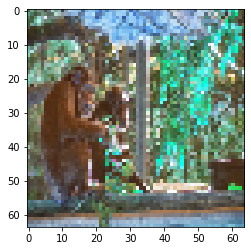

In [55]:
img = array_to_img(df[12000])
plt.imshow(img, interpolation='nearest')
plt.show()

In [56]:
inp_img = df[12000].reshape(1,64,64,3)
inp_img.shape

(1, 64, 64, 3)

### Predict the animal name

In [57]:
data_classes[int(np.argmax(model.predict(x=inp_img/255.),axis = 1))]

'chimpanzee'

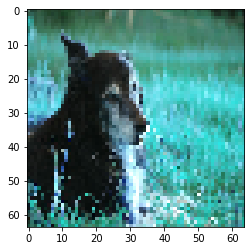

In [58]:
img = array_to_img(df[6000])
plt.imshow(img, interpolation='nearest')
plt.show()

In [59]:
inp_img = df[6000].reshape(1,64,64,3)
inp_img.shape

(1, 64, 64, 3)

In [60]:
data_classes[int(np.argmax(model.predict(x=inp_img/255.),axis = 1))]

'collie'